In [1]:
import censusScrape
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cn = censusScrape.census("e65848a4151cc08c06a88a2aee66683367563a1e")

In [7]:
x = np.linspace(2010, 2018, num=100)

In [ ]:
dat = cn.get_data_all_years_from_coord([-121.0, 37.0], data_names={"B00001_001E":"Total Population"})

In [ ]:
dat

In [13]:
dat = cn.get_data_spline_from_coord([-121.0, 37.0], data_names = {"B00001_001E":"Total Population", "B08532_015E":"transport", "B25129_039E":"tenure"})
print(dat)

{'NAME': 'Census Tract 21, Merced County, California', 'Total Population': <scipy.interpolate._cubic.PchipInterpolator object at 0x0000020128E9DFC0>, 'transport': None, 'tenure': <scipy.interpolate._cubic.PchipInterpolator object at 0x0000020128FCD258>, 'state': '06', 'county': '047', 'tract': '002100'}


In [12]:
dat

{'NAME': 'Census Tract 20, Coconino County, Arizona',
 'Total Population': <scipy.interpolate._cubic.PchipInterpolator at 0x20128d7aba0>,
 'photographers': None,
 'state': '04',
 'county': '005',
 'tract': '002000'}

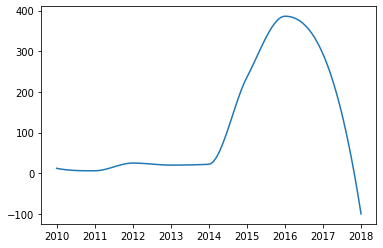

In [14]:
plt.plot(x, dat["tenure"](x))

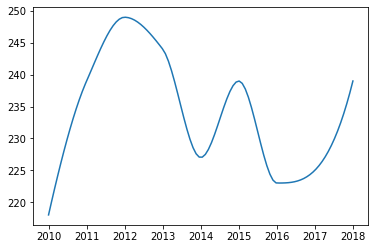

In [15]:
plt.plot(x,dat["Total Population"](x))